In [1]:
# so wird die Berechnung über die GPU verhindert (sonst auskommentieren)
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [46]:
import pandas as pd
import keras
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
# für Reproduzierbarkeit
import random
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(42)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
tf.compat.v1.set_random_seed(42)
sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [4]:
train_data = pd.read_csv("../data/MNIST/mnist_train.csv").sample(frac = 1)
test_data = pd.read_csv("../data/MNIST/mnist_test.csv").sample(frac = 1)

In [5]:
X_train = train_data.drop("label", axis = 1)
y_train = train_data["label"]

X_val = test_data.drop("label", axis = 1)
y_val = test_data["label"]

In [6]:
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)

scaler_val = StandardScaler()
X_val_scaled = scaler_val.fit_transform(X_val)

y_train_onehot = pd.get_dummies(y_train)
y_val_onehot = pd.get_dummies(y_val)

In [7]:
# use samller dataset for increased speed
X_train_small = X_train_scaled[:1000, :]
X_val_small = X_val_scaled[:500, :]
y_train_small = y_train_onehot[:1000]
y_val_small = y_val_onehot[:500]

n_cols = X_train_small.shape[1]

In [21]:
kernel_initializer = keras.initializers.GlorotNormal()
bias_initializer = keras.initializers.GlorotNormal()

In [61]:
keras.backend.clear_session()
model = Sequential()
model.add(Dense(128, "relu", 
                input_shape = (n_cols,), 
                kernel_initializer = kernel_initializer,
                bias_initializer = bias_initializer))
model.add(Dense(128, "relu", 
                kernel_initializer = kernel_initializer,
                bias_initializer = bias_initializer))
model.add(Dense(64, "relu", 
                kernel_initializer = kernel_initializer,
                bias_initializer = bias_initializer))
model.add(Dense(32, "relu", 
                kernel_initializer = kernel_initializer,
                bias_initializer = bias_initializer))
model.add(Dense(10, "softmax",
                kernel_initializer = kernel_initializer,
                bias_initializer = bias_initializer))

In [79]:
list(np.array(model.trainable_weights[len(model.trainable_weights)-1].shape))[0]

10

In [59]:
model.compile("adam", "categorical_crossentropy", metrics = ["accuracy"])

In [60]:
start_time = time.time()
model.fit(X_train_small, y_train_small, 
          batch_size = 32, 
          epochs = 10, 
          validation_data = (X_val_small, y_val_small))
end_time = time.time()

Epoch 1/10
32/32 [==============================] - 0s 15ms/step - loss: 1.7944 - accuracy: 0.4210 - val_loss: 1.1333 - val_accuracy: 0.6580
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6338 - accuracy: 0.8190 - val_loss: 0.5625 - val_accuracy: 0.8300
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.2308 - accuracy: 0.9360 - val_loss: 0.4213 - val_accuracy: 0.8760
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 0.0887 - accuracy: 0.9790 - val_loss: 0.4124 - val_accuracy: 0.8880
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.0373 - accuracy: 0.9940 - val_loss: 0.4343 - val_accuracy: 0.8840
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 0.0168 - accuracy: 0.9990 - val_loss: 0.4439 - val_accuracy: 0.8980
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.4495 - val_accuracy: 0.8860
Epoch 8/10
32/32 [=

In [25]:
print("Overall calculation took {} seconds.".format(end_time - start_time))

Overall calculation took 3.1530466079711914 seconds.


In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 127,658
Trainable params: 127,658
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.trainable_weights

[<tf.Variable 'dense_11/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.05316269,  0.01764145,  0.01522263, ...,  0.07493449,
         -0.0201476 ,  0.09051652],
        [-0.00516469,  0.07823637,  0.02811813, ..., -0.0174622 ,
         -0.02144132, -0.02854406],
        [-0.04033467,  0.00961152,  0.03930797, ..., -0.0174436 ,
          0.03845177, -0.03893438],
        ...,
        [ 0.04866969,  0.05048861, -0.01158144, ..., -0.03740012,
          0.01336047, -0.01347332],
        [ 0.01840364, -0.02679037,  0.03217081, ..., -0.0442641 ,
         -0.0488762 , -0.01088821],
        [-0.07488225, -0.07203993, -0.02490162, ...,  0.01187966,
          0.01317079,  0.01347652]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 1.05052628e-02,  4.43697721e-02,  5.36354966e-02,  1.45312354e-01,
        -3.80746126e-02,  1.04380332e-01, -2.93051694e-02,  1.41089305e-01,
         4.91514541e-02,  6.65253550e-02,  1.10950403e-01, -4.939

In [44]:
model.history.history

{'loss': [1.6997151374816895,
  0.5685737729072571,
  0.22081886231899261,
  0.08773744851350784,
  0.04008699208498001,
  0.027366068214178085,
  0.01222313567996025,
  0.006970043294131756,
  0.003947007469832897,
  0.002732733730226755],
 'accuracy': [0.4830000102519989,
  0.8360000252723694,
  0.9449999928474426,
  0.9860000014305115,
  0.9950000047683716,
  0.9980000257492065,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.9451012015342712,
  0.5809768438339233,
  0.4495954215526581,
  0.4583590030670166,
  0.46944260597229004,
  0.5146772861480713,
  0.5284720063209534,
  0.5291286706924438,
  0.5365120768547058,
  0.5490995645523071],
 'val_accuracy': [0.7599999904632568,
  0.843999981880188,
  0.8799999952316284,
  0.8700000047683716,
  0.878000020980835,
  0.8679999709129333,
  0.8700000047683716,
  0.8700000047683716,
  0.878000020980835,
  0.8759999871253967]}

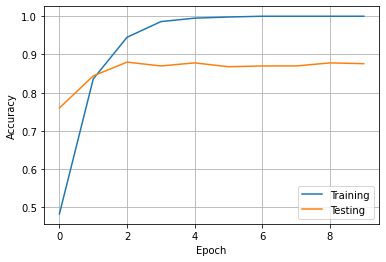

In [49]:
plt.plot(model.history.epoch, model.history.history["accuracy"], label = "Training")
plt.plot(model.history.epoch, model.history.history["val_accuracy"], label = "Testing")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [52]:
class NNError(Exception):
    pass

In [55]:
# function for neural network struktures
def nn_model_structure(layers, 
                       neurons,
                       n_cols,
                       weight_initializer = keras.initializers.GlorotNormal(), 
                       bias_initializer = keras.initializers.GlorotNormal(), 
                       activation_first = "relu",
                       classification = True
                      ):
    
    if len(neurons) != layers:
        raise NNError("Wrong input shape: neurons must be of length of the value of layers.")
        
    keras.backend.clear_session()
    
    model = Sequential()
    
    for layer in range(layers):
        # first layer
        if layer == 0:
            model.add(Dense(units = neurons[layer], 
                            activation = activation_first, 
                            input_shape = (n_cols, ), 
                            kernel_initializer = weight_initializer,
                            bias_initializer = bias_initializer
                           )
                     )
        elif layer == layers - 1:
            # output layer
            if classification:
                if neurons[layer] == 2:
                    model.add(Dense(units = neurons[layer], 
                                    activation = "sigmoid", 
                                    kernel_initializer = weight_initializer,
                                    bias_initializer = bias_initializer
                                   )
                             )
                else:
                    model.add(Dense(units = neurons[layer], 
                                    activation = "softmax", 
                                    kernel_initializer = weight_initializer,
                                    bias_initializer = bias_initializer
                                   )
                             )
            else:
                model.add(Dense(units = neurons[layer], 
                                kernel_initializer = weight_initializer,
                                bias_initializer = bias_initializer
                               )
                         )
        # hidden layers
        else:
            model.add(Dense(units = neurons[layer], 
                            activation = activation_first, 
                            kernel_initializer = weight_initializer,
                            bias_initializer = bias_initializer
                           )
                     )
            
    return model

In [80]:
# function for neural network compiling
def nn_model_compile(model,
                     optimizer = "adam",
                     show_metrics = ["accuracy"]
                    ):
    
    output_size = list(np.array(model.trainable_weights[len(model.trainable_weights)-1].shape))[0]
    
    # regression
    if output_size == 1:
        model.compile(optimizer = optimizer,
                      loss = "mean_squared_error",
                      metrics = show_metrics
                     )
    
    # binary classification
    elif output_size == 2:
        model.compile(optimizer = optimizer,
                      loss = "binary_crossentropy",
                      metrics = show_metrics
                     )
    
    # multiclass classification
    else:
        model.compile(optimizer = optimizer,
                      loss = "categorical_crossentropy",
                      metrics = show_metrics
                     )
    
    return model

In [82]:
# function for neural network fitting
def nn_model_fit(model,
                 X_train,
                 y_train,
                 X_val = None,
                 y_val = None,
                 batch_size = 32,
                 epochs = 10,
                 callbacks = None
                ):
    
    model.fit(X_train,
              y_train,
              batch_size = batch_size,
              epochs = epochs,
              callbacks = callbacks,
              validation_data = (X_val, y_val)
             )
    
    return model

In [85]:
# function for accuracy plotting
def nn_plot_acc(model,
                title = ""
               ):
    
    plt.plot(model.history.epoch, model.history.history["accuracy"], label = "Training")
    plt.plot(model.history.epoch, model.history.history["val_accuracy"], label = "Testing")
    plt.legend()
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()

In [88]:
# function for saving a model
def nn_save(model,
            path_name
           ):
    
    model.save(path_name)

In [90]:
# function for loading a model
def nn_load(path_name):
    
    model = keras.models.load_model(path_name)
    
    return model

Epoch 1/10
32/32 [==============================] - 0s 5ms/step - loss: 1.7275 - accuracy: 0.4260 - val_loss: 0.9344 - val_accuracy: 0.7440
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5726 - accuracy: 0.8440 - val_loss: 0.5213 - val_accuracy: 0.8300
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.2336 - accuracy: 0.9380 - val_loss: 0.4049 - val_accuracy: 0.8620
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1030 - accuracy: 0.9730 - val_loss: 0.4122 - val_accuracy: 0.8880
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9950 - val_loss: 0.4124 - val_accuracy: 0.8920
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9980 - val_loss: 0.4154 - val_accuracy: 0.9000
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.4238 - val_accuracy: 0.9020
Epoch 8/10
32/32 [==

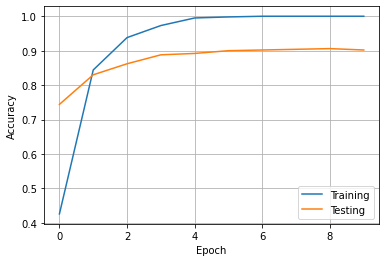

In [91]:
model = nn_model_structure(layers = 5,
                           neurons = [128, 128, 64, 32, 10],
                           n_cols = X_train_small.shape[1])
model = nn_model_compile(model)
model = nn_model_fit(model,
                     X_train = X_train_small,
                     y_train = y_train_small,
                     X_val = X_val_small,
                     y_val = y_val_small)
model.summary()
nn_plot_acc(model)
nn_save(model, "../models/model_test_small.h5")